                       Model  Precision    Recall  F1 Score  Accuracy
0              Decision Tree   0.990654  1.000000  0.995305  0.995455
1        AdaBoost Classifier   0.990654  1.000000  0.995305  0.995455
2              XGBClassifier   0.990654  1.000000  0.995305  0.995455
3  Gradient Boost Classifier   0.990654  1.000000  0.995305  0.995455
4               RandomForest   1.000000  0.943396  0.970874  0.972727
5            Majority Voting   0.990654  1.000000  0.995305  0.995455


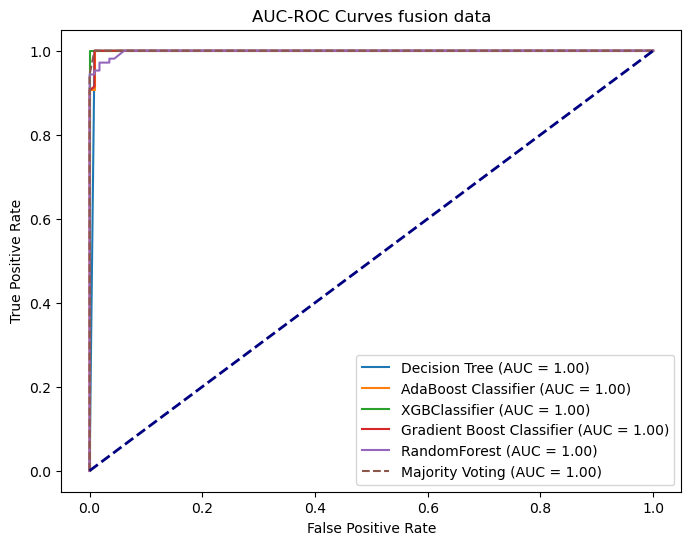

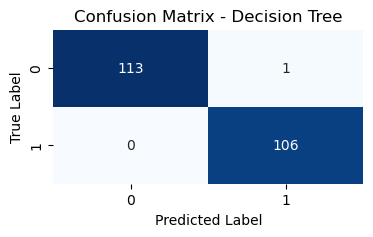

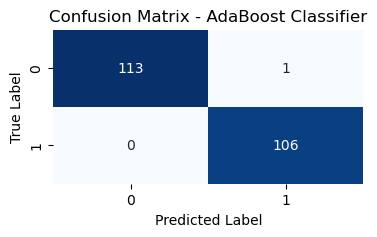

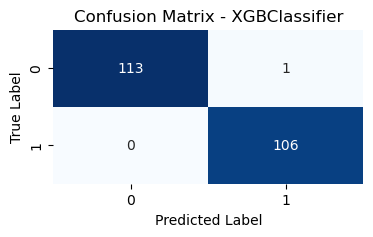

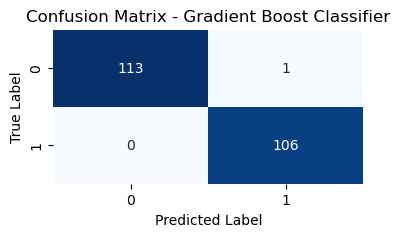

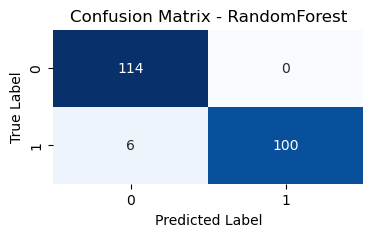

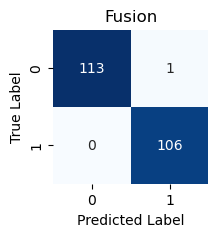

In [3]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, VotingClassifier
from xgboost import XGBClassifier
import lightgbm as lgb
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

# Read the data
data = pd.read_csv("data_phenotypic.csv")
data.drop("Unnamed: 0", inplace=True, axis=1)
data['DX_GROUP'] = data['DX_GROUP'].replace(2, 0)

X = data.iloc[:, 1:]
y = data.iloc[:, 0]

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Create instances of the classifiers
decision_tree = DecisionTreeClassifier()
adaboost_classifier = AdaBoostClassifier()
xgb_classifier = XGBClassifier()
gradient_boost_classifier = GradientBoostingClassifier()
random_forest = RandomForestClassifier()

# Define the majority voting classifier
models = {
    "Decision Tree": decision_tree,
    "AdaBoost Classifier": adaboost_classifier,
    "XGBClassifier": xgb_classifier,
    "Gradient Boost Classifier": gradient_boost_classifier,
    "RandomForest": random_forest
}

# Initialize majority voting classifier
majority_voting_classifier = VotingClassifier(estimators=list(models.items()), voting='hard')

# Train each individual classifier
for name, model in models.items():
    model.fit(X_train, y_train)

# Train the majority voting classifier
majority_voting_classifier.fit(X_train, y_train)

# Initialize lists to store metrics
model_names = list(models.keys()) + ['Majority Voting']
precision_scores = []
recall_scores = []
f1_scores = []
accuracy_scores = []

# Predictions for each individual classifier on the test set
individual_predictions = {name: model.predict(X_test) for name, model in models.items()}

# Predictions for the majority voting classifier on the test set
majority_voting_predictions = majority_voting_classifier.predict(X_test)

# Calculate metrics for each individual classifier
for name, predictions in individual_predictions.items():
    precision_scores.append(precision_score(y_test, predictions))
    recall_scores.append(recall_score(y_test, predictions))
    f1_scores.append(f1_score(y_test, predictions))
    accuracy_scores.append(accuracy_score(y_test, predictions))

# Calculate metrics for the majority voting classifier
precision_scores.append(precision_score(y_test, majority_voting_predictions))
recall_scores.append(recall_score(y_test, majority_voting_predictions))
f1_scores.append(f1_score(y_test, majority_voting_predictions))
accuracy_scores.append(accuracy_score(y_test, majority_voting_predictions))

# Create a DataFrame to store the results
results_df = pd.DataFrame({
    'Model': model_names,
    'Precision': precision_scores,
    'Recall': recall_scores,
    'F1 Score': f1_scores,
    'Accuracy': accuracy_scores
})

# Print the results table
print(results_df)

# Plot ROC curves for classifiers that support predict_proba
plt.figure(figsize=(8, 6))
for name, model in models.items():
    if hasattr(model, 'predict_proba'):
        fpr, tpr, _ = roc_curve(y_test, model.predict_proba(X_test)[:, 1])
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')

# Approximate ROC curve for majority voting
majority_probs = np.sum(list(individual_predictions.values()), axis=0) / len(models)
fpr_majority, tpr_majority, _ = roc_curve(y_test, majority_probs)
roc_auc_majority = auc(fpr_majority, tpr_majority)
plt.plot(fpr_majority, tpr_majority, label=f'Majority Voting (AUC = {roc_auc_majority:.2f})', linestyle='--')

plt.plot([0, 1], [0, 1], color='navy', linestyle='--', linewidth=2)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('AUC-ROC Curves fusion data')
plt.legend(loc='lower right')
plt.savefig('roc_curve_fusion.png')
plt.show()

# Plot confusion matrix for each classifier
for name, predictions in individual_predictions.items():
    conf_matrix = confusion_matrix(y_test, predictions)
    plt.figure(figsize=(4, 2))
    sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title(f'Confusion Matrix - {name}')
    plt.savefig(f'confusion_matrix_{name}.png')
    plt.show()

# Plot confusion matrix for majority voting classifier
conf_matrix_majority_voting = confusion_matrix(y_test, majority_voting_predictions)
plt.figure(figsize=(2, 2))
sns.heatmap(conf_matrix_majority_voting, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Fusion')
plt.savefig('Fusion.png')
plt.show()


                       Model  Precision    Recall  F1 Score  Accuracy
0              Decision Tree   0.764151  0.764151  0.764151  0.772727
1        AdaBoost Classifier   0.721649  0.660377  0.689655  0.713636
2              XGBClassifier   0.772277  0.735849  0.753623  0.768182
3  Gradient Boost Classifier   0.812500  0.735849  0.772277  0.790909
4               RandomForest   0.586207  0.481132  0.528497  0.586364
5            Majority Voting   0.852632  0.764151  0.805970  0.822727


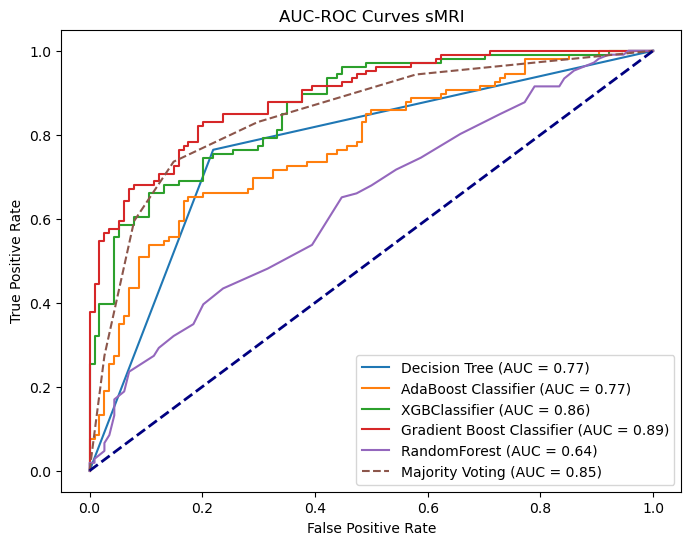

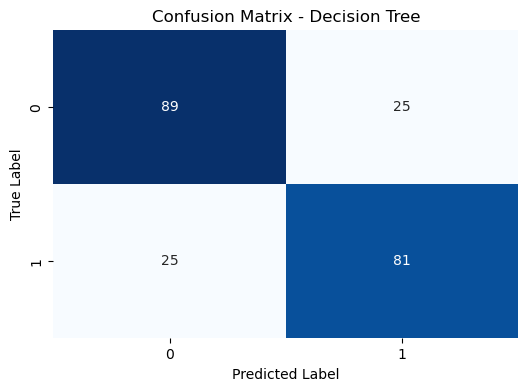

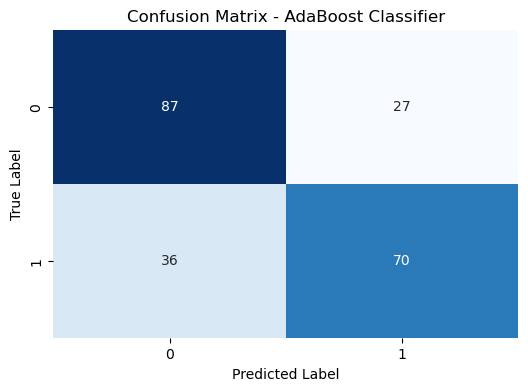

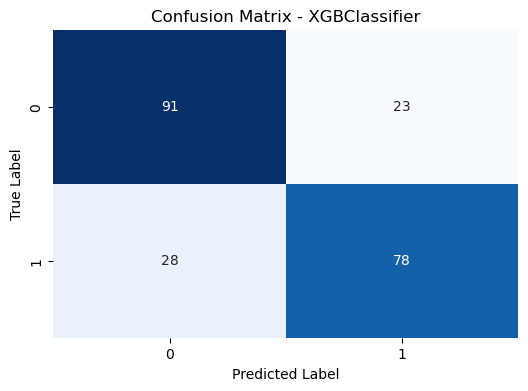

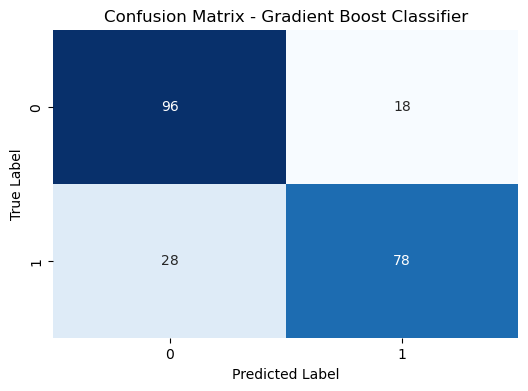

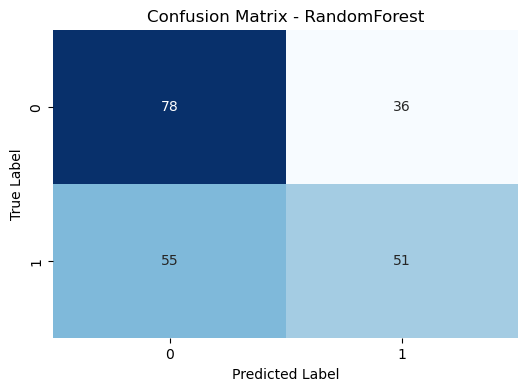

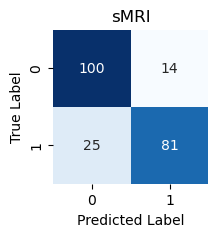

In [6]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, VotingClassifier
from xgboost import XGBClassifier
import lightgbm as lgb
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

# Read the data
data1 = pd.read_csv("data_phenotypic.csv")
data=pd.read_csv("imagefeatures.csv")
# data.drop("Unnamed: 0", inplace=True, axis=1)
data1['DX_GROUP'] = data1['DX_GROUP'].replace(2, 0)

X = data
y = data1['DX_GROUP']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Create instances of the classifiers
decision_tree = DecisionTreeClassifier()
adaboost_classifier = AdaBoostClassifier()
xgb_classifier = XGBClassifier()
gradient_boost_classifier = GradientBoostingClassifier()
random_forest = RandomForestClassifier()

# Define the majority voting classifier
models = {
    "Decision Tree": decision_tree,
    "AdaBoost Classifier": adaboost_classifier,
    "XGBClassifier": xgb_classifier,
    "Gradient Boost Classifier": gradient_boost_classifier,
    "RandomForest": random_forest
}

# Initialize majority voting classifier
majority_voting_classifier = VotingClassifier(estimators=list(models.items()), voting='hard')

# Train each individual classifier
for name, model in models.items():
    model.fit(X_train, y_train)

# Train the majority voting classifier
majority_voting_classifier.fit(X_train, y_train)

# Initialize lists to store metrics
model_names = list(models.keys()) + ['Majority Voting']
precision_scores = []
recall_scores = []
f1_scores = []
accuracy_scores = []

# Predictions for each individual classifier on the test set
individual_predictions = {name: model.predict(X_test) for name, model in models.items()}

# Predictions for the majority voting classifier on the test set
majority_voting_predictions = majority_voting_classifier.predict(X_test)

# Calculate metrics for each individual classifier
for name, predictions in individual_predictions.items():
    precision_scores.append(precision_score(y_test, predictions))
    recall_scores.append(recall_score(y_test, predictions))
    f1_scores.append(f1_score(y_test, predictions))
    accuracy_scores.append(accuracy_score(y_test, predictions))

# Calculate metrics for the majority voting classifier
precision_scores.append(precision_score(y_test, majority_voting_predictions))
recall_scores.append(recall_score(y_test, majority_voting_predictions))
f1_scores.append(f1_score(y_test, majority_voting_predictions))
accuracy_scores.append(accuracy_score(y_test, majority_voting_predictions))

# Create a DataFrame to store the results
results_df = pd.DataFrame({
    'Model': model_names,
    'Precision': precision_scores,
    'Recall': recall_scores,
    'F1 Score': f1_scores,
    'Accuracy': accuracy_scores
})

# Print the results table
print(results_df)

# Plot ROC curves for classifiers that support predict_proba
plt.figure(figsize=(8, 6))
for name, model in models.items():
    if hasattr(model, 'predict_proba'):
        fpr, tpr, _ = roc_curve(y_test, model.predict_proba(X_test)[:, 1])
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')

# Approximate ROC curve for majority voting
majority_probs = np.sum(list(individual_predictions.values()), axis=0) / len(models)
fpr_majority, tpr_majority, _ = roc_curve(y_test, majority_probs)
roc_auc_majority = auc(fpr_majority, tpr_majority)
plt.plot(fpr_majority, tpr_majority, label=f'Majority Voting (AUC = {roc_auc_majority:.2f})', linestyle='--')

plt.plot([0, 1], [0, 1], color='navy', linestyle='--', linewidth=2)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('AUC-ROC Curves sMRI')
plt.legend(loc='lower right')
plt.savefig('roc_curve.png')
plt.show()

# Plot confusion matrix for each classifier
for name, predictions in individual_predictions.items():
    conf_matrix = confusion_matrix(y_test, predictions)
    plt.figure(figsize=(6, 4))
    sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title(f'Confusion Matrix - {name}')
    plt.savefig(f'confusion_matrix_{name}.png')
    plt.show()

# Plot confusion matrix for majority voting classifier
conf_matrix_majority_voting = confusion_matrix(y_test, majority_voting_predictions)
plt.figure(figsize=(2, 2))
sns.heatmap(conf_matrix_majority_voting, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('sMRI')
plt.savefig('smri.png')
plt.show()


                       Model  Precision    Recall  F1 Score  Accuracy
0              Decision Tree   0.962963  0.981132  0.971963  0.972727
1        AdaBoost Classifier   0.971963  0.981132  0.976526  0.977273
2              XGBClassifier   0.971963  0.981132  0.976526  0.977273
3  Gradient Boost Classifier   0.971963  0.981132  0.976526  0.977273
4               RandomForest   0.908257  0.933962  0.920930  0.922727
5            Majority Voting   0.971963  0.981132  0.976526  0.977273


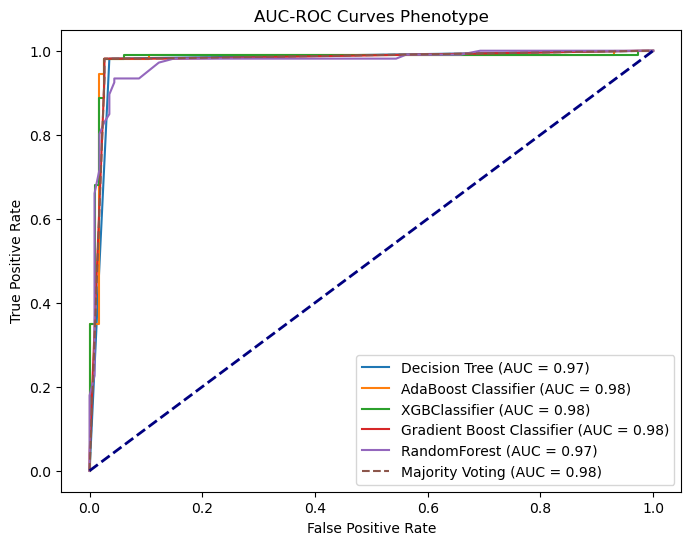

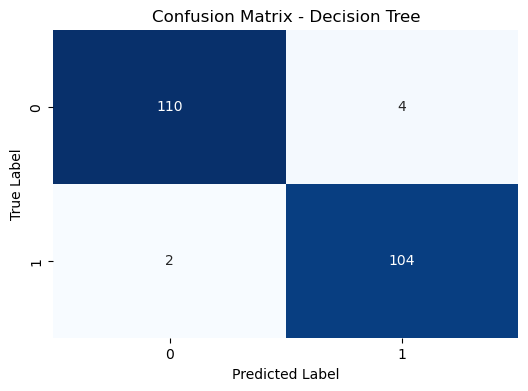

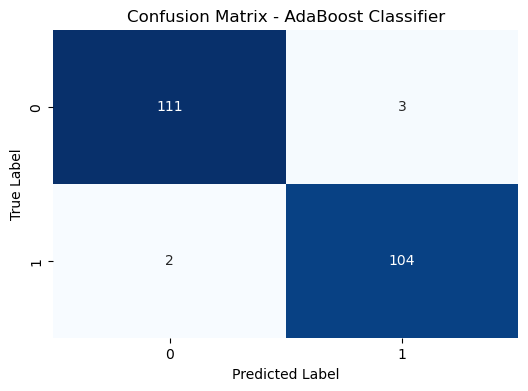

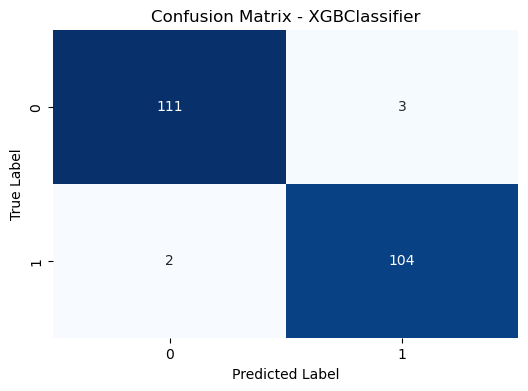

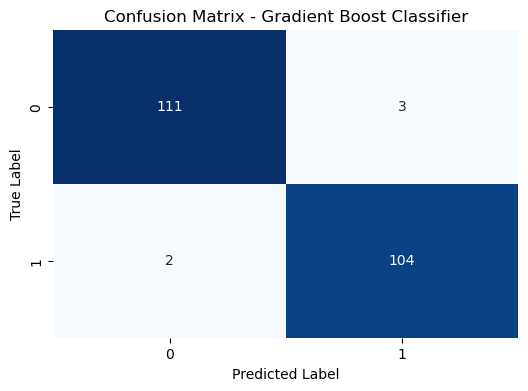

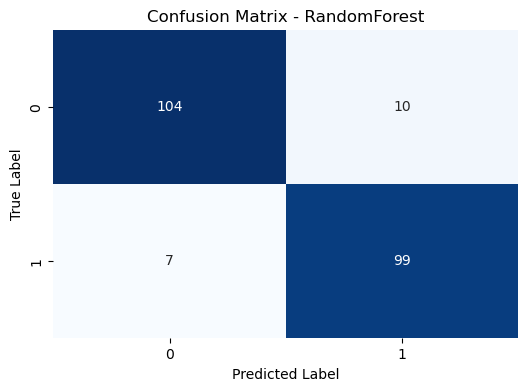

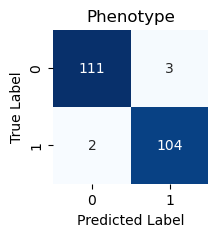

In [5]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, VotingClassifier
from xgboost import XGBClassifier
import lightgbm as lgb
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

# Read the data
data1 = pd.read_csv("data_phenotypic.csv")
data=pd.read_csv("merged.csv")
# data.drop("Unnamed: 0", inplace=True, axis=1)
data1['DX_GROUP'] = data1['DX_GROUP'].replace(2, 0)

X = data
y = data1['DX_GROUP']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Create instances of the classifiers
decision_tree = DecisionTreeClassifier()
adaboost_classifier = AdaBoostClassifier()
xgb_classifier = XGBClassifier()
gradient_boost_classifier = GradientBoostingClassifier()
random_forest = RandomForestClassifier()

# Define the majority voting classifier
models = {
    "Decision Tree": decision_tree,
    "AdaBoost Classifier": adaboost_classifier,
    "XGBClassifier": xgb_classifier,
    "Gradient Boost Classifier": gradient_boost_classifier,
    "RandomForest": random_forest
}

# Initialize majority voting classifier
majority_voting_classifier = VotingClassifier(estimators=list(models.items()), voting='hard')

# Train each individual classifier
for name, model in models.items():
    model.fit(X_train, y_train)

# Train the majority voting classifier
majority_voting_classifier.fit(X_train, y_train)

# Initialize lists to store metrics
model_names = list(models.keys()) + ['Majority Voting']
precision_scores = []
recall_scores = []
f1_scores = []
accuracy_scores = []

# Predictions for each individual classifier on the test set
individual_predictions = {name: model.predict(X_test) for name, model in models.items()}

# Predictions for the majority voting classifier on the test set
majority_voting_predictions = majority_voting_classifier.predict(X_test)

# Calculate metrics for each individual classifier
for name, predictions in individual_predictions.items():
    precision_scores.append(precision_score(y_test, predictions))
    recall_scores.append(recall_score(y_test, predictions))
    f1_scores.append(f1_score(y_test, predictions))
    accuracy_scores.append(accuracy_score(y_test, predictions))

# Calculate metrics for the majority voting classifier
precision_scores.append(precision_score(y_test, majority_voting_predictions))
recall_scores.append(recall_score(y_test, majority_voting_predictions))
f1_scores.append(f1_score(y_test, majority_voting_predictions))
accuracy_scores.append(accuracy_score(y_test, majority_voting_predictions))

# Create a DataFrame to store the results
results_df = pd.DataFrame({
    'Model': model_names,
    'Precision': precision_scores,
    'Recall': recall_scores,
    'F1 Score': f1_scores,
    'Accuracy': accuracy_scores
})

# Print the results table
print(results_df)

# Plot ROC curves for classifiers that support predict_proba
plt.figure(figsize=(8, 6))
for name, model in models.items():
    if hasattr(model, 'predict_proba'):
        fpr, tpr, _ = roc_curve(y_test, model.predict_proba(X_test)[:, 1])
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')

# Approximate ROC curve for majority voting
majority_probs = np.sum(list(individual_predictions.values()), axis=0) / len(models)
fpr_majority, tpr_majority, _ = roc_curve(y_test, majority_probs)
roc_auc_majority = auc(fpr_majority, tpr_majority)
plt.plot(fpr_majority, tpr_majority, label=f'Majority Voting (AUC = {roc_auc_majority:.2f})', linestyle='--')

plt.plot([0, 1], [0, 1], color='navy', linestyle='--', linewidth=2)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('AUC-ROC Curves Phenotype')
plt.legend(loc='lower right')
plt.savefig('roc_curve.png')
plt.show()

# Plot confusion matrix for each classifier
for name, predictions in individual_predictions.items():
    conf_matrix = confusion_matrix(y_test, predictions)
    plt.figure(figsize=(6, 4))
    sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title(f'Confusion Matrix - {name}')
    plt.savefig(f'confusion_matrix_{name}.png')
    plt.show()

# Plot confusion matrix for majority voting classifier
conf_matrix_majority_voting = confusion_matrix(y_test, majority_voting_predictions)
plt.figure(figsize=(2, 2))
sns.heatmap(conf_matrix_majority_voting, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Phenotype')
plt.savefig('pheno.png')
plt.show()
